In [24]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Introduction

PCA forms the basis of multivariate data analysis based on projection methods. The most important use of PCA is to represent a multivariate data table as smaller set of variables (summary indices) in order to observe trends, jumps, clusters and outliers. This overview may uncover the relationships between observations and variables, and among the variables.

PCA is a very flexible tool and allows analysis of datasets that may contain, for example, multicollinearity, missing values, categorical data, and imprecise measurements. The goal is to extract the important information from the data and to express this information as a set of summary indices called principal components.

Statistically, PCA finds lines, planes and hyper-planes in the K-dimensional space that approximate the data as well as possible in the least squares sense. A line or plane that is the least squares approximation of a set of data points makes the variance of the coordinates on the line or plane as large as possible.

It's worth understanding that PCA has the same limitations as all linear systems in how well it is able to separate variables with non-linear relationships.

In [20]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [21]:
# what we will do here is reduce the iris dimensions to two variables that explain it the best

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Principal components

What the plot below shows is that if we plot out the iris samples spaced out along the two principal components identified by PCA, the various classes will be maximally separable.

Text(0.5, 1.0, 'PCA of IRIS dataset')

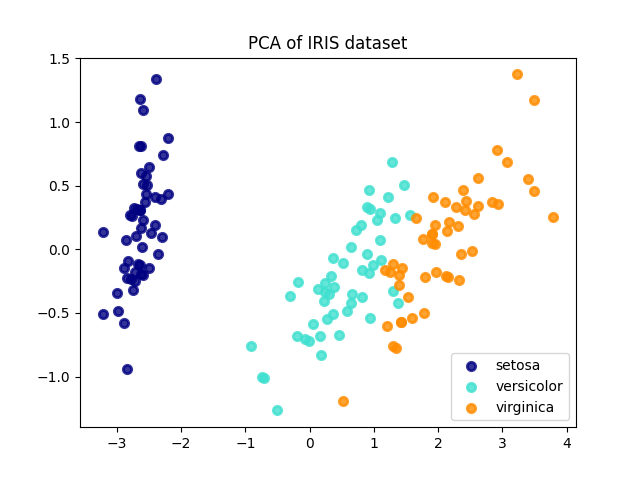

In [22]:
# clear old visualizations
plt.close('all')

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

# Using components to de-noise

In [28]:
# let us import the digits dataset

X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1_000, test_size=100
)

In [29]:
# we define a small helper function to help display the data

def plot_digits(X, title):
    plt.close('all')
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

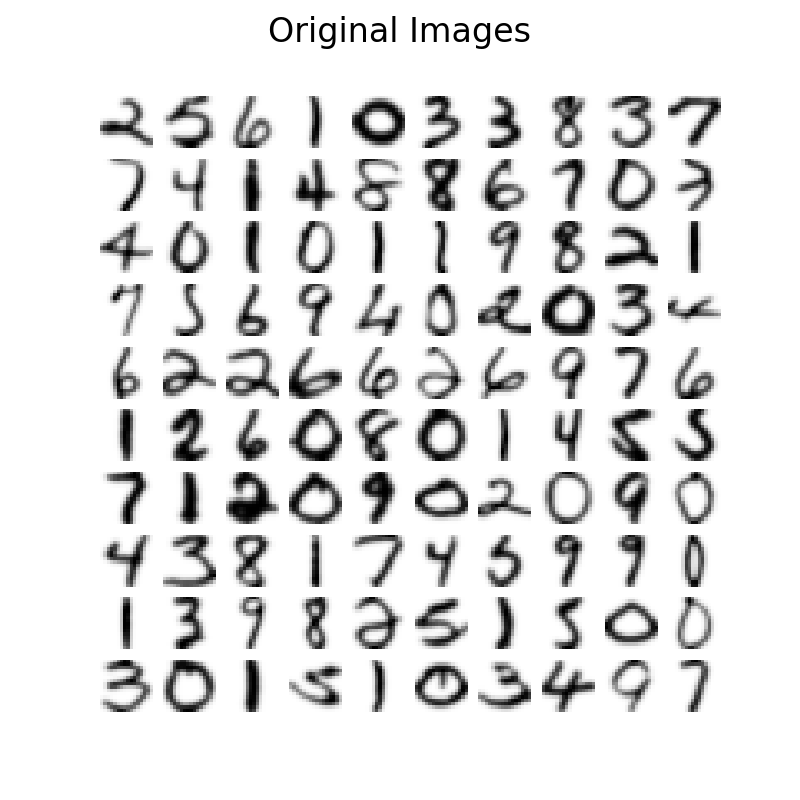

In [31]:
plot_digits(X_test, "Original images")

In [32]:
# let us add some noise to these images

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

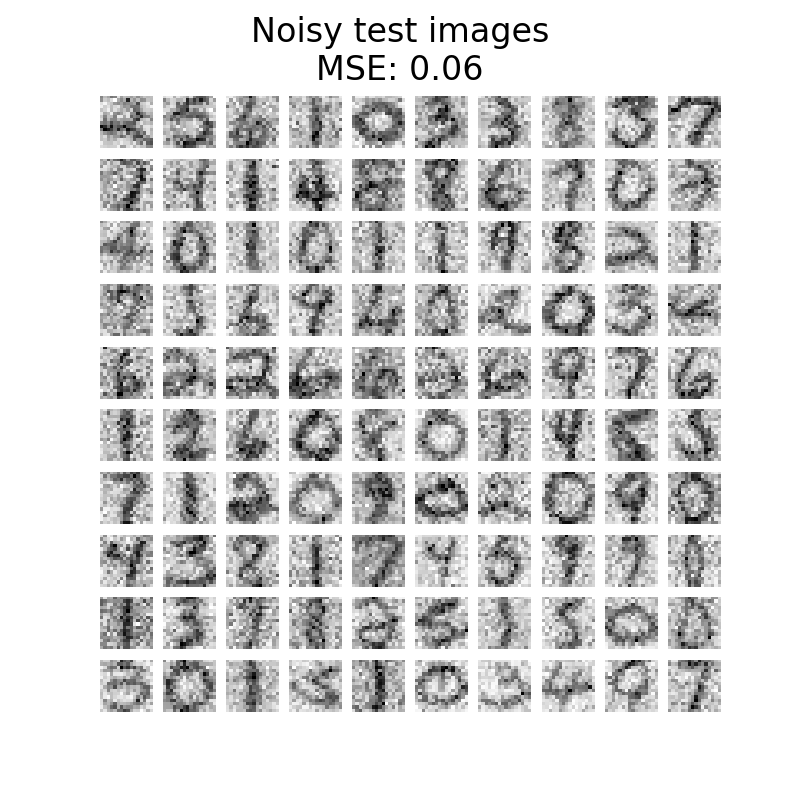

In [33]:
plot_digits(
    X_test_noisy, f"Noisy images\n MSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

In [35]:
# we train the model with a fair number of components to give it a chance to learn patterns

pca = PCA(n_components=32)

pca.fit(X_train_noisy)

PCA(n_components=32)

Now, we can transform and reconstruct the noisy test set. Since we used fewer components than the number of original features, we will get an approximation of the original set. By dropping components that don't explain variance well, we hope to remove noise.

In [36]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

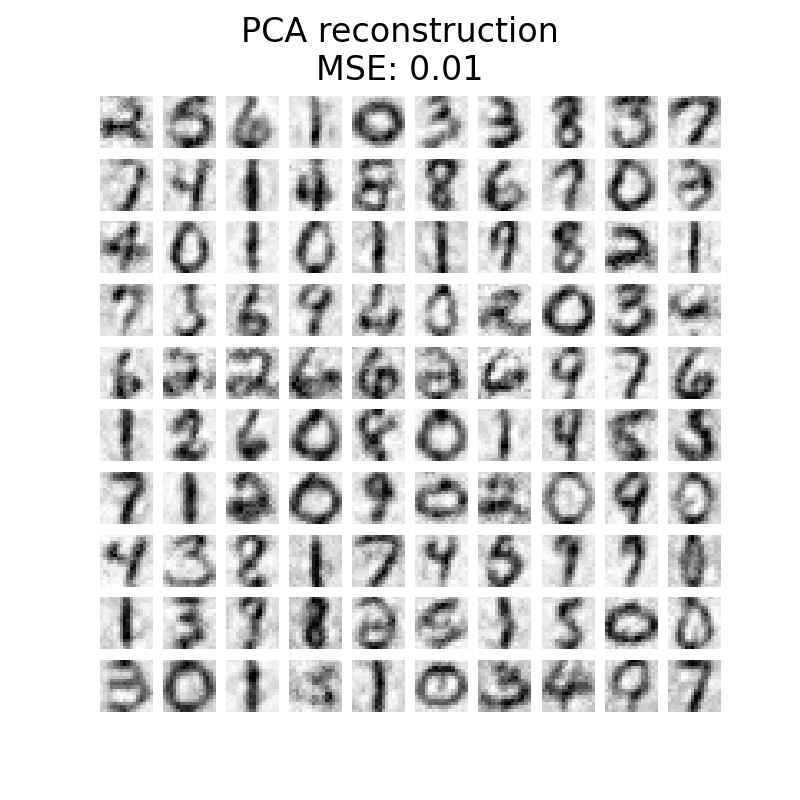

In [37]:
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)